In [4]:
# Train two classifiers on 'make_moon' dataset using KNN, Decision Tree and SVM
# Calculate the MSE, Accuracy, Precision, Recall and ROC curves of the models used. 

# pandas 1.3.4
import pandas as pd

# numpy 1.21.3
import numpy as np

# scikitlearn 1.0.2
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_precision_recall_curve, precision_score, recall_score, roc_curve, mean_squared_error,roc_auc_score, plot_roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC


# matplotlib 3.5.1
import matplotlib.pyplot as plt

# mlxtend 0.19.0
from mlxtend.plotting import plot_decision_regions


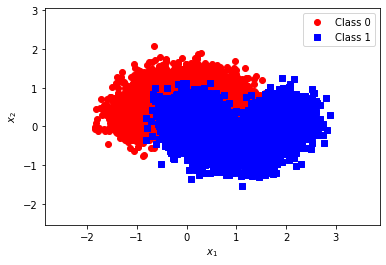

In [5]:
# Create dataset
X, y = make_moons(n_samples=10000, noise=0.3, random_state = 0)

# Plot dataset
plt.scatter(X[ y == 0, 0], X[ y == 0, 1], c='r', marker='o', label='Class 0')
plt.scatter(X[ y == 1, 0], X[ y == 1, 1], c='b', marker='s', label='Class 1')
plt.xlim(X[:, 0].min()-1, X[:, 0].max()+1)
plt.ylim(X[:, 1].min()-1, X[:, 1].max()+1)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='best')
plt.show()



# K-Nearest Neighbours Classifier (APPENDIX A)

In [6]:
# Fit and transform 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Standardization
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Stack arrays for plotting
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))


### GridSearchCV for KNN    

In [7]:
knn = KNeighborsClassifier()

# Using +- 10 of the square root of n (sample size)
k_range = list(range(91,111))
# using manhatten and euclidean distance measures
p_val_range = list(range(1,3))
# scoring
scoring_list = ['accuracy','precision','f1','recall','roc_auc']
param_grid = dict(n_neighbors = k_range, p = p_val_range)

# Defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring=scoring_list, refit='accuracy', return_train_score=True, verbose=1)
grid.fit(X_train_std, y_train)

# check best scores, estimator, params
grid.cv_results_
grid.best_estimator_
grid.best_index_
grid.best_params_
grid.best_score_




Fitting 10 folds for each of 40 candidates, totalling 400 fits


0.9172499999999999

In [8]:
# print(f' Results: {grid.cv_results_} \n')
print(f' Best Estimator: {grid.best_estimator_} \n')
print(f' Best Params: {grid.best_params_} \n')
print(f' Best Score: {grid.best_score_:.3f}\n')
print(f' Best Results: {grid.cv_results_}\n')

 Best Estimator: KNeighborsClassifier(n_neighbors=106, p=1) 

 Best Params: {'n_neighbors': 106, 'p': 1} 

 Best Score: 0.917

 Best Results: {'mean_fit_time': array([0.00596604, 0.00487936, 0.01132009, 0.01350262, 0.00785229,
       0.01030891, 0.00809269, 0.00664563, 0.00928261, 0.00571685,
       0.00795846, 0.00707741, 0.00865927, 0.00623162, 0.0059463 ,
       0.00835671, 0.00790057, 0.00742004, 0.00634403, 0.00584924,
       0.00622396, 0.00676811, 0.00554786, 0.0063267 , 0.00755496,
       0.00705779, 0.00531504, 0.00585656, 0.00576417, 0.00590291,
       0.00703144, 0.0057925 , 0.00655274, 0.00596251, 0.00702159,
       0.00544868, 0.00618963, 0.00583863, 0.00515873, 0.00724773]), 'std_fit_time': array([0.0019817 , 0.00082251, 0.00965394, 0.00738503, 0.00497748,
       0.00567301, 0.00447382, 0.00168688, 0.0052561 , 0.0011634 ,
       0.01027783, 0.0014924 , 0.00752533, 0.00223946, 0.00175449,
       0.00629378, 0.00211338, 0.00351145, 0.00132657, 0.0009313 ,
       0.0013343 ,

[KNN]
Misclassified samples: 158
Accuracy: 0.921


<AxesSubplot:>

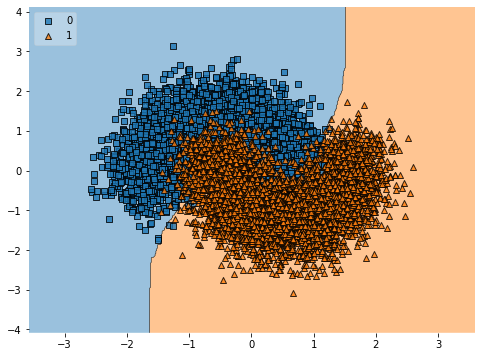

In [9]:
# Use best params on the test data

knn = KNeighborsClassifier(n_neighbors=106, p=1, metric='minkowski')
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
y_pred_b = knn.predict_proba(X_test_std)[:,1]
print('[KNN]')
print(f'Misclassified samples: {(y_test != y_pred).sum()}')
print(f'Accuracy: {accuracy_score(y_test, y_pred):.3f}')

#plot decision regions for knn classifier
plt.figure(figsize=(8,6))
plot_decision_regions(X_combined_std, 
                        y_combined, clf=knn, 
                        legend=2)


### Confusion Matrix & Precision Recall Curve

 Overall Precision: 0.920
 Overall Recall: 0.920
 MSE: 0.079


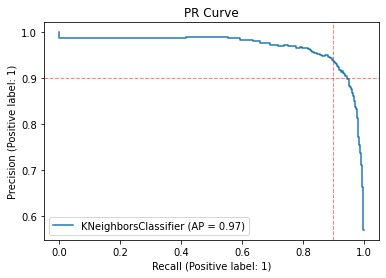

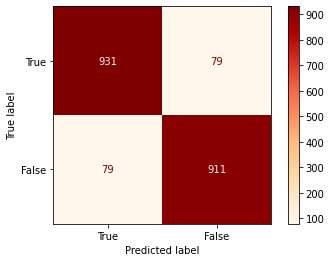

In [10]:
# Precision Recall Curve
fig, ax = plt.subplots()
plot_precision_recall_curve(knn, X_test_std, y_test, ax=ax )
ax.axhline(0.9, c='r', ls="--", lw=1, alpha=0.5)
ax.axvline(0.9, c='r', ls="--", lw=1, alpha=0.5)
ax.set_title("PR Curve")

# Confusion Matrix
plot_confusion_matrix(knn, X_test_std, y_test, values_format='d', display_labels = ['True','False'], cmap = 'OrRd')
print(f' Overall Precision: {precision_score(y_test, y_pred):.3f}')
print(f' Overall Recall: {recall_score(y_test, y_pred):.3f}')
print(f' MSE: {mean_squared_error(y_test, y_pred):.3f}')

## AUC-ROC Curve KNN

 False Positive Rate: [0.         0.0029703  0.0049505  0.0049505  0.00594059 0.00792079
 0.01089109 0.01188119 0.01584158 0.01584158 0.01980198 0.02178218
 0.02178218 0.02277228 0.02277228 0.02277228 0.02673267 0.02673267
 0.02772277 0.02772277 0.02772277 0.03069307 0.03168317 0.03465347
 0.03762376 0.03960396 0.03960396 0.04158416 0.04257426 0.04356436
 0.04455446 0.04554455 0.04554455 0.04653465 0.04950495 0.05148515
 0.05148515 0.05445545 0.05544554 0.05742574 0.05940594 0.05940594
 0.06138614 0.06336634 0.06435644 0.06633663 0.06633663 0.06831683
 0.07128713 0.07425743 0.07821782 0.08019802 0.08217822 0.08514851
 0.08514851 0.08811881 0.09207921 0.09405941 0.0980198  0.1029703
 0.10594059 0.10594059 0.10990099 0.11683168 0.12079208 0.12376238
 0.12772277 0.12970297 0.13267327 0.13465347 0.13762376 0.14257426
 0.15346535 0.15643564 0.16039604 0.16633663 0.17821782 0.18514851
 0.19306931 0.2019802  0.20990099 0.21485149 0.21980198 0.22574257
 0.23366337 0.24059406 0.24653465 0.26138

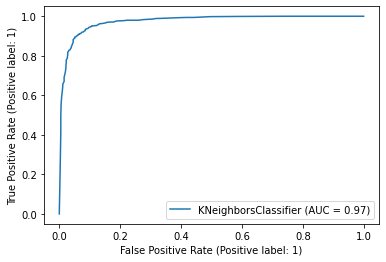

In [11]:
# roc curve for knn 
fpr_knn, tpr_knn, thresh_knn = roc_curve(y_test, y_pred_b, pos_label=1)
print(f' False Positive Rate: {fpr_knn}\n')
print(f' True Positive Rate: {tpr_knn}\n')
print(f' Threshold: {thresh_knn}\n')

auc_score_knn = roc_auc_score(y_test, y_pred_b)
print(f'AUC Score: {auc_score_knn}\n')

plot_roc_curve(knn, X_test_std, y_test)

# Decision Tree (APPENDIX B)

### GridSearchCV for Decision Tree

In [12]:
tree = DecisionTreeClassifier(random_state=42)

# params
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
# n_jobs = -1; use all procesors, cross-validation = 10 (computational complexity significant)
scoring_list = ['accuracy','precision','f1','recall','roc_auc']
grid_tree = GridSearchCV(tree, params, scoring=scoring_list, refit= 'accuracy', n_jobs=-1, verbose=1, cv=10)
grid_tree.fit(X_train_std, y_train)
# check best scores, estimator, params
grid_tree.cv_results_
grid_tree.best_estimator_
grid_tree.best_index_
grid_tree.best_params_
grid_tree.best_score_


Fitting 10 folds for each of 294 candidates, totalling 2940 fits


0.9106250000000001

In [13]:
print(f' Results: {grid.cv_results_} \n')
print(f' Best Estimator: {grid_tree.best_estimator_} \n')
print(f' Best Params: {grid_tree.best_params_} \n')
print(f' Best Score: {grid_tree.best_score_:.3f} \n')
print(f' Best Results: {grid_tree.cv_results_}\n')

 Results: {'mean_fit_time': array([0.00596604, 0.00487936, 0.01132009, 0.01350262, 0.00785229,
       0.01030891, 0.00809269, 0.00664563, 0.00928261, 0.00571685,
       0.00795846, 0.00707741, 0.00865927, 0.00623162, 0.0059463 ,
       0.00835671, 0.00790057, 0.00742004, 0.00634403, 0.00584924,
       0.00622396, 0.00676811, 0.00554786, 0.0063267 , 0.00755496,
       0.00705779, 0.00531504, 0.00585656, 0.00576417, 0.00590291,
       0.00703144, 0.0057925 , 0.00655274, 0.00596251, 0.00702159,
       0.00544868, 0.00618963, 0.00583863, 0.00515873, 0.00724773]), 'std_fit_time': array([0.0019817 , 0.00082251, 0.00965394, 0.00738503, 0.00497748,
       0.00567301, 0.00447382, 0.00168688, 0.0052561 , 0.0011634 ,
       0.01027783, 0.0014924 , 0.00752533, 0.00223946, 0.00175449,
       0.00629378, 0.00211338, 0.00351145, 0.00132657, 0.0009313 ,
       0.0013343 , 0.00184594, 0.00090624, 0.00136648, 0.00551619,
       0.0018348 , 0.0012261 , 0.00112292, 0.00147267, 0.00300349,
       0.0017052

[Tree]
Misclassified samples: 163
Accuracy: 0.918


<AxesSubplot:>

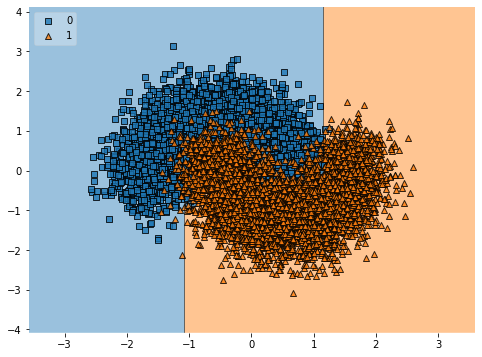

In [14]:
# Use best params on the test data

tree = DecisionTreeClassifier(random_state=42, max_leaf_nodes=17, min_samples_leaf=2)
tree.fit(X_train_std, y_train)
y_pred_tree = tree.predict(X_test_std)
y_pred_tree_p = tree.predict_proba(X_test_std)[:,1]
print('[Tree]')
print(f'Misclassified samples: {(y_test != y_pred_tree).sum()}')
print(f'Accuracy: {accuracy_score(y_test, y_pred_tree):.3f}')

#plot decision regions for tree classifier
plt.figure(figsize=(8,6))
plot_decision_regions(X_combined_std, 
                        y_combined, clf=tree, 
                        legend=2)

## Confusion Matrix & Precision Recall Curve

 Overall Precision: 0.915
 Overall Recall: 0.921
 MSE: 0.082


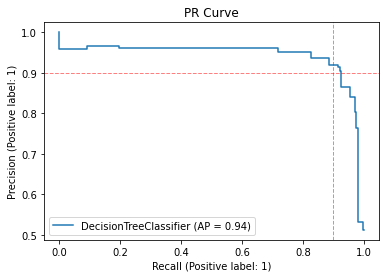

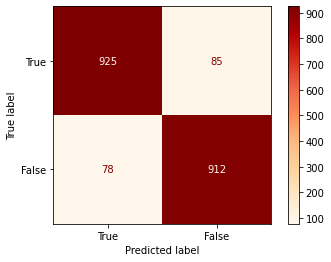

In [15]:

fig, ax = plt.subplots()
plot_precision_recall_curve(tree, X_test_std, y_test, ax=ax )
ax.axhline(0.9, c='r', ls="--", lw=1, alpha=0.5)
ax.axvline(0.9, c='r', ls="--", lw=1, alpha=0.5)
ax.set_title("PR Curve")

plot_confusion_matrix(tree, X_test_std, y_test, values_format='d', display_labels = ['True','False'], cmap ='OrRd' )
print(f' Overall Precision: {precision_score(y_test, y_pred_tree):.3f}')
print(f' Overall Recall: {recall_score(y_test, y_pred_tree):.3f}')
print(f' MSE: {mean_squared_error(y_test, y_pred_tree):.3f}')

## AUC-ROC Curve Decision Tree

 False Positive Rate: [0.         0.0039604  0.00693069 0.02871287 0.04158416 0.05940594
 0.07821782 0.08415842 0.0970297  0.14653465 0.17920792 0.18217822
 0.23366337 0.2980198  0.36633663 0.85841584 0.93465347 1.        ]

 True Positive Rate: [0.         0.09191919 0.1959596  0.71818182 0.82727273 0.88686869
 0.91717172 0.92121212 0.92626263 0.95555556 0.96868687 0.97070707
 0.97575758 0.97979798 0.98282828 0.9979798  1.         1.        ]

 Threshold: [1.99189189 0.99189189 0.97342995 0.96425339 0.90024331 0.79856115
 0.60089686 0.55319149 0.44594595 0.33865815 0.32835821 0.26829268
 0.15613383 0.06666667 0.05594406 0.02648676 0.02461538 0.01190476]

AUC Score: 0.96



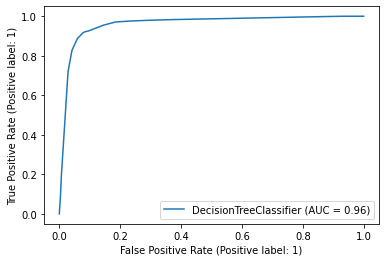

In [16]:
# roc curve for tree 
fpr_tree, tpr_tree, thresh_tree = roc_curve(y_test, y_pred_tree_p, pos_label=1)
print(f' False Positive Rate: {fpr_tree}\n')
print(f' True Positive Rate: {tpr_tree}\n')
print(f' Threshold: {thresh_tree}\n')

auc_score_tree = roc_auc_score(y_test, y_pred_tree_p)
print(f'AUC Score: {round((auc_score_tree),3)}\n')

plot_roc_curve(tree, X_test_std, y_test)

# Support Vector Classifier (APPENDIX C)

In [32]:
# params
param_C = [1.0, 100.0, 1000.0]
param_gamma = [0.0001, 0.1, 1.0]
scoring_list = ['accuracy','precision','f1','recall','roc_auc']

svm = SVC(random_state=42, verbose=0)

# set the param_grid parameter of GridSearchCV to a list of dictionaries
param_grid = [{'C': param_C, 
               'gamma': param_gamma, 
               'kernel': ['rbf']}]
grid_svm = GridSearchCV(estimator=svm, 
                  param_grid=param_grid, 
                  scoring=scoring_list,
                  refit='accuracy',
                  verbose=0, cv=3)

grid_svm = grid_svm.fit(X_train_std, y_train)
# check best scores, estimator, params
grid_svm.cv_results_
grid_svm.best_estimator_
grid_svm.best_index_
grid_svm.best_params_
grid_svm.best_score_



0.9165000286442065

In [33]:
print(f' Results: {grid_svm.cv_results_} \n')
print(f' Best Estimator: {grid_svm.best_estimator_} \n')
print(f' Best Params: {grid_svm.best_params_} \n')
print(f' Best Score: {grid_svm.best_score_:.3f} \n')
print(f' Best Results: {grid_svm.cv_results_}\n')

 Results: {'mean_fit_time': array([2.08162498, 1.09290806, 0.62041473, 0.98631581, 0.77647559,
       1.91548141, 1.05990505, 1.67502062, 8.9011546 ]), 'std_fit_time': array([0.09596239, 0.30667204, 0.01411895, 0.03988671, 0.05184765,
       0.24507229, 0.11755424, 0.19485867, 1.86576874]), 'mean_score_time': array([4.55739935, 2.29473027, 1.21752   , 2.09646893, 1.18506861,
       1.0954086 , 1.89980197, 1.17220664, 1.04133073]), 'std_score_time': array([0.04133915, 0.3936646 , 0.0876812 , 0.07786988, 0.02401206,
       0.09700109, 0.01499268, 0.03917712, 0.00592541]), 'param_C': masked_array(data=[1.0, 1.0, 1.0, 100.0, 100.0, 100.0, 1000.0, 1000.0,
                   1000.0],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.0001, 0.1, 1.0, 0.0001, 0.1, 1.0, 0.0001, 0.1, 1.0],
             mask=[False, False, False, False, False, False, False, Fals

In [30]:
print(f' Best Params: {grid_svm.best_params_} \n')

 Best Params: {'C': 1.0, 'gamma': 1.0, 'kernel': 'rbf'} 



[SVM]
Misclassified samples: 159
Accuracy: 0.920


<AxesSubplot:>

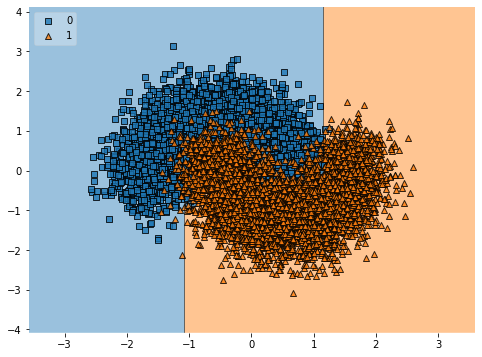

In [35]:
# Use best params on the test data

svm = SVC(random_state=42, C=1.0, gamma=1.0, kernel='rbf',probability=True )
svm.fit(X_train_std, y_train)
y_pred_svm = svm.predict(X_test_std)
y_pred_svm_p = svm.predict_proba(X_test_std)[:,1]
print('[SVM]')
print(f'Misclassified samples: {(y_test != y_pred_svm).sum()}')
print(f'Accuracy: {accuracy_score(y_test, y_pred_svm):.3f}')

#plot decision regions for svm classifier
plt.figure(figsize=(8,6))
plot_decision_regions(X_combined_std, 
                        y_combined, clf=tree, 
                        legend=2)

## Confusion Matrix & Precision Recall Curve

 Overall Precision: 0.918
 Overall Recall: 0.922
 MSE: 0.080


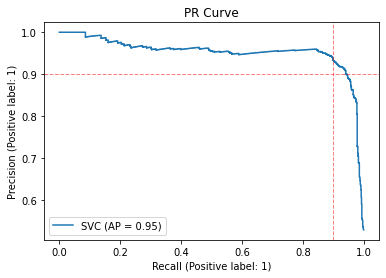

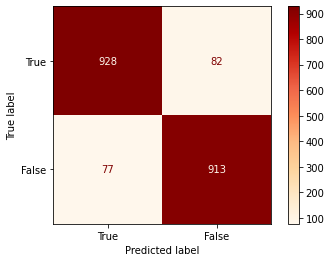

In [36]:
fig, ax = plt.subplots()
plot_precision_recall_curve(svm, X_test_std, y_test, ax=ax )
ax.axhline(0.9, c='r', ls="--", lw=1, alpha=0.5)
ax.axvline(0.9, c='r', ls="--", lw=1, alpha=0.5)
ax.set_title("PR Curve")

plot_confusion_matrix(svm, X_test_std, y_test, values_format='d', display_labels = ['True','False'], cmap ='OrRd' )
print(f' Overall Precision: {precision_score(y_test, y_pred_svm):.3f}')
print(f' Overall Recall: {recall_score(y_test, y_pred_svm):.3f}')
print(f' MSE: {mean_squared_error(y_test, y_pred_svm):.3f}')

## AUC-ROC Curve SVM

 False Positive Rate: [0.         0.0039604  0.00693069 0.02871287 0.04158416 0.05940594
 0.07821782 0.08415842 0.0970297  0.14653465 0.17920792 0.18217822
 0.23366337 0.2980198  0.36633663 0.85841584 0.93465347 1.        ]

 True Positive Rate: [0.         0.09191919 0.1959596  0.71818182 0.82727273 0.88686869
 0.91717172 0.92121212 0.92626263 0.95555556 0.96868687 0.97070707
 0.97575758 0.97979798 0.98282828 0.9979798  1.         1.        ]

 Threshold: [1.99189189 0.99189189 0.97342995 0.96425339 0.90024331 0.79856115
 0.60089686 0.55319149 0.44594595 0.33865815 0.32835821 0.26829268
 0.15613383 0.06666667 0.05594406 0.02648676 0.02461538 0.01190476]

AUC Score: 0.96



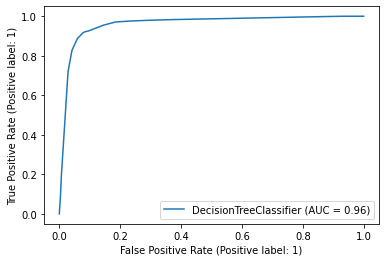

In [37]:
# roc curve for svm 
fpr_tree, tpr_tree, thresh_tree = roc_curve(y_test, y_pred_tree_p, pos_label=1)
print(f' False Positive Rate: {fpr_tree}\n')
print(f' True Positive Rate: {tpr_tree}\n')
print(f' Threshold: {thresh_tree}\n')

auc_score_tree = roc_auc_score(y_test, y_pred_tree_p)
print(f'AUC Score: {round((auc_score_tree),3)}\n')

plot_roc_curve(tree, X_test_std, y_test)

## Precision Recall Curves (Combined)

Text(0.5, 1.0, 'PR Curve')

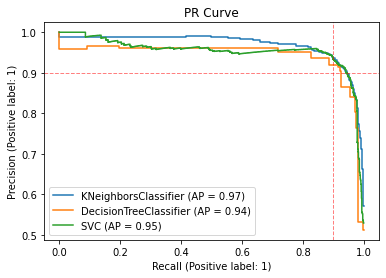

In [38]:
# list of models
clf_models = [knn,tree,svm]

fig, ax = plt.subplots()
for m in clf_models:
    plot_precision_recall_curve(m, X_test_std, y_test, ax=ax )
ax.axhline(0.9, c='r', ls="--", lw=1, alpha=0.5)
ax.axvline(0.9, c='r', ls="--", lw=1, alpha=0.5)
ax.set_title("PR Curve")